In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMClassifier

from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report

ImportError: ignored

# Funciones

In [ ]:
def grafica_outliers(df,i):

  fig, (ax_box, ax_hist) = plt.subplots(nrows=2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
  sb.boxplot(df[i], orient='h', ax=ax_box)
  sb.kdeplot(df.loc[df['loan_status'] == 0, i], color='green', ax=ax_hist, fill=True)
  sb.kdeplot(df.loc[df['loan_status'] == 1, i], color='red', ax=ax_hist, fill=True)
  ax_hist.legend(['No Default', 'Default'])
  ax_box.set_title(i)

  ax_box.set(yticks=[])
  sb.despine(ax=ax_hist)
  sb.despine(ax=ax_box, left=True)
  plt.tight_layout()
  plt.show()

def grafica_outliers2(df,i):

  fig, (ax_box, ax_hist, ax_box2) = plt.subplots(nrows=3, sharex=True, gridspec_kw={"height_ratios": (.15, .85, 0.15)})
  sb.boxplot(df[i], orient='h', ax=ax_box)
  sb.kdeplot(df.loc[df['loan_status'] == 0, i], color='green', ax=ax_hist, fill=True)
  sb.kdeplot(df.loc[df['loan_status'] == 1, i], color='red', ax=ax_hist, fill=True)
  sb.boxplot(data= df, x=i, y='loan_status', orient='h', ax=ax_box2,palette=['green','red'], saturation=0.7 ) # extra ,
  ax_hist.legend(['No Default', 'Default'])
  #ax_box2.legend(['No Default', 'Default'])


  ax_box.set_title(i)
  ax_box.set(yticks=[])
  ax_box2.set(xlabel='')

  sb.despine(ax=ax_hist)
  sb.despine(ax=ax_box, left=True)
  sb.despine(ax=ax_box2)

  plt.tight_layout()
  plt.show()

def Cuantiles(lista):
    c = [0,1,5,10,20,25,30,40,50,60,70,75,80,90,92.5,95,97.5,99,100]
    matrix = pd.concat([pd.DataFrame(c),pd.DataFrame(np.percentile(lista.dropna(),c))],axis = 1)
    matrix.columns = ["Cuantil","Valor_Cuantil"]
    return(matrix.T)



# Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataScience/Dataset/Riesgo de credito/LendingClub_corto.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


# Preprocesamiento

## Duplicados

In [ ]:
df_duplicados = df.duplicated()
df_duplicados.sum()

165

In [ ]:
df[df.duplicated()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4
15989,23,90000,MORTGAGE,7.0,EDUCATION,B,8000,10.36,0,0.09,N,3
15995,24,48000,MORTGAGE,4.0,MEDICAL,A,4000,5.42,0,0.08,N,4
16025,24,10000,RENT,8.0,PERSONAL,A,3000,7.90,1,0.30,N,3
16028,23,100000,MORTGAGE,7.0,EDUCATION,A,15000,7.88,0,0.15,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.42,0,0.06,N,12
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.88,0,0.08,N,17
32172,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.99,0,0.10,N,12
32259,39,40000,OWN,4.0,VENTURE,B,1000,10.37,0,0.03,N,16


In [ ]:
df.shape

(32581, 12)

In [ ]:
# Eliminar dupplicados
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(32416, 12)

# Variables

In [ ]:
# RELACION INGRESO ENTRE DEUDA
df1 = df.loc[:,['person_income', 'loan_amnt', 'loan_percent_income']]
df1.loc[:,'ratio_DeudaIngreso'] = round(df['loan_amnt']/df['person_income'],2)

# las columnas son iguales?
data_igual = df1.loan_percent_income.equals(df1.ratio_DeudaIngreso)
data_igual # False = NO

False

In [ ]:
# DATAFRAME PARA OBSERVAR LAS SIGUIENTES VARIABLES
df1.loc[:,['person_income', 'loan_amnt', 'loan_percent_income','ratio_DeudaIngreso']].head()

,person_income,loan_amnt,loan_percent_income,ratio_DeudaIngreso
0,59000,35000,0.59,0.59
1,9600,1000,0.10,0.10
2,9600,5500,0.57,0.57
3,65500,35000,0.53,0.53
4,54400,35000,0.55,0.64


In [ ]:
df1.shape[0]

32416

In [ ]:
# REGISTROS DIFERENTES ENTRE 2 COLUMNAS
filas_diferentes = df1.loc[df1['loan_percent_income'] != df1['ratio_DeudaIngreso']]
filas_diferentes

,person_income,loan_amnt,loan_percent_income,ratio_DeudaIngreso
4,54400,35000,0.55,0.64
17,92111,35000,0.32,0.38
36,48000,30000,0.63,0.62
40,62050,30000,0.41,0.48
48,66300,30000,0.38,0.45
...,...,...,...,...
32480,62050,25000,0.34,0.40
32485,24000,3000,0.13,0.12
32542,200000,3000,0.01,0.02
32555,80000,18000,0.23,0.22


In [ ]:
# HAY 1005 REGISTROS DIFERENTES, CREAMOS LA COLUMNA

df.loc[:,'ratio_DeudaIngreso'] = round(df['loan_amnt']/df['person_income'],2)
df.drop('loan_percent_income', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32416 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  object 
 3   person_emp_length           31529 non-null  float64
 4   loan_intent                 32416 non-null  object 
 5   loan_grade                  32416 non-null  object 
 6   loan_amnt                   32416 non-null  int64  
 7   loan_int_rate               29321 non-null  float64
 8   loan_status                 32416 non-null  int64  
 9   cb_person_default_on_file   32416 non-null  object 
 10  cb_person_cred_hist_length  32416 non-null  int64  
 11  ratio_DeudaIngreso          32416 non-null  float64
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


In [ ]:
for col in df:
  print(col,'-->',df[col].nunique())
  if df[col].nunique()<20:
    print(df[col].value_counts(normalize=True)*100)
  print() # genera espacio

person_age --> 58

person_income --> 4295

person_home_ownership --> 4
RENT        50.524432
MORTGAGE    41.241979
OWN          7.906589
OTHER        0.326999
Name: person_home_ownership, dtype: float64

person_emp_length --> 36

loan_intent --> 6
EDUCATION            19.777270
MEDICAL              18.638944
VENTURE              17.528381
PERSONAL             16.960760
DEBTCONSOLIDATION    16.007527
HOMEIMPROVEMENT      11.087117
Name: loan_intent, dtype: float64

loan_grade --> 7
A    33.017646
B    32.042818
C    19.860563
D    11.167325
E     2.970755
F     0.743460
G     0.197433
Name: loan_grade, dtype: float64

loan_amnt --> 753

loan_int_rate --> 348

loan_status --> 2
0    78.13117
1    21.86883
Name: loan_status, dtype: float64

cb_person_default_on_file --> 2
N    82.323544
Y    17.676456
Name: cb_person_default_on_file, dtype: float64

cb_person_cred_hist_length --> 29

ratio_DeudaIngreso --> 77



In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32416.0,27.747008,6.354100,20.00,23.00,26.00,30.00,144.00
person_income,32416.0,66091.640826,62015.580269,4000.00,38542.00,55000.00,79218.00,6000000.00
person_emp_length,31529.0,4.790510,4.145490,0.00,2.00,4.00,7.00,123.00
loan_amnt,32416.0,9593.845632,6322.730241,500.00,5000.00,8000.00,12250.00,35000.00
loan_int_rate,29321.0,11.017265,3.241680,5.42,7.90,10.99,13.47,23.22
loan_status,32416.0,0.218688,0.413363,0.00,0.00,0.00,0.00,1.00
cb_person_cred_hist_length,32416.0,5.811297,4.059030,2.00,3.00,4.00,8.00,30.00
ratio_DeudaIngreso,32416.0,0.170586,0.107116,0.00,0.09,0.15,0.23,0.83


In [ ]:
var_numericas = df.select_dtypes(include='number').columns.tolist()
var_categoricas = df.select_dtypes(include='object').columns.tolist()

In [ ]:
print('Variables Numéricas:\n',var_numericas)
print()
print('Variables Categóricas:\n',var_categoricas)

Variables Numéricas:
 ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 'cb_person_cred_hist_length', 'ratio_DeudaIngreso']

Variables Categóricas:
 ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


## person_age

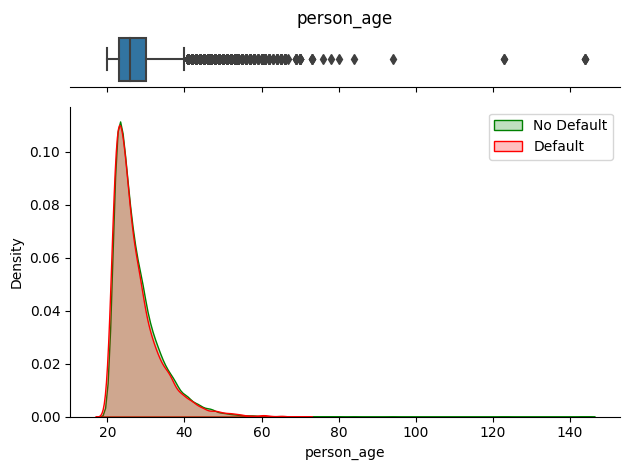

In [ ]:
grafica_outliers(df,'person_age')

In [ ]:
Cuantiles(df.person_age)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Cuantil,0.0,1.0,5.0,10.0,20.0,25.0,30.0,40.0,50.0,60.0,70.0,75.0,80.0,90.0,92.5,95.0,97.5,99.0,100.0
Valor_Cuantil,20.0,21.0,22.0,22.0,23.0,23.0,24.0,25.0,26.0,27.0,29.0,30.0,32.0,36.0,38.0,40.0,44.0,50.0,144.0


In [ ]:
df.loc[df['person_age']>=80,:]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length,ratio_DeudaIngreso
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,N,3,0.02
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,N,2,0.03
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,N,3,0.25
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,N,4,0.26
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,N,25,0.00
32416,94,24000,RENT,1.0,MEDICAL,C,6500,NaN,0,N,27,0.27
32422,80,64000,RENT,7.0,MEDICAL,B,6800,11.71,0,N,25,0.11
32506,84,94800,MORTGAGE,2.0,PERSONAL,A,10000,7.51,0,N,24,0.11


In [ ]:
# ELIMINAR REGISTROS EDAD>=80
df.drop(df[df['person_age']>80].index,axis=0, inplace=True)

In [ ]:
df.person_age.max()

80

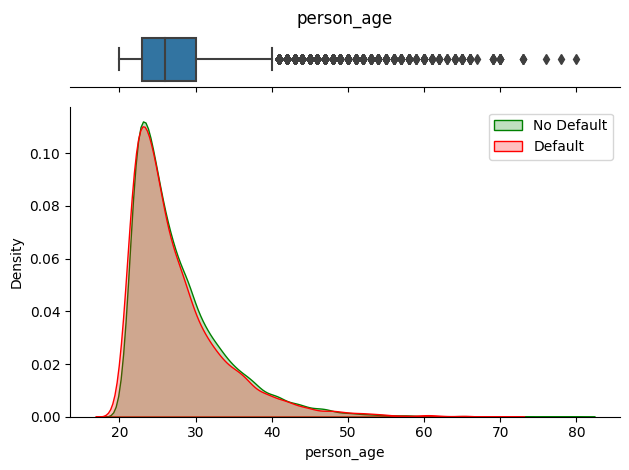

In [ ]:
grafica_outliers(df,'person_age')

## person_emp_length

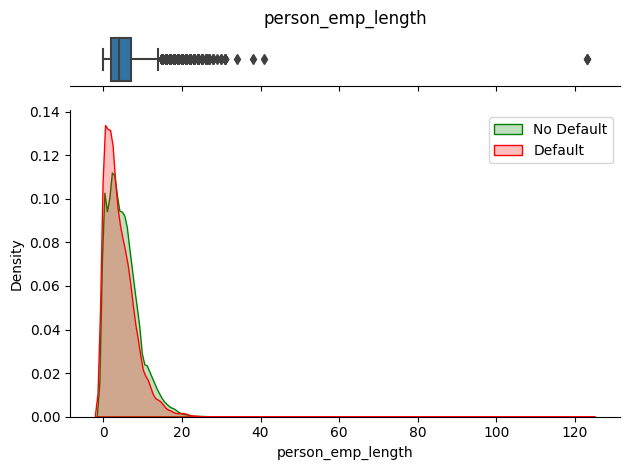

In [ ]:
grafica_outliers(df,'person_emp_length')

In [ ]:
Cuantiles(df.person_emp_length)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Cuantil,0.0,1.0,5.0,10.0,20.0,25.0,30.0,40.0,50.0,60.0,70.0,75.0,80.0,90.0,92.5,95.0,97.5,99.0,100.0
Valor_Cuantil,0.0,0.0,0.0,0.0,1.0,2.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,10.0,11.0,13.0,15.0,18.0,123.0


In [ ]:
df.loc[df['person_emp_length']>18,]['person_emp_length'].value_counts().sort_index().to_frame()

,person_emp_length
19.0,64
20.0,42
21.0,38
22.0,19
23.0,10
24.0,10
25.0,8
26.0,6
27.0,5
28.0,3


In [ ]:
df.drop(df[df['person_emp_length']>41].index, axis=0, inplace=True)

In [ ]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3093
loan_status                      0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
ratio_DeudaIngreso               0
dtype: int64

# Pipeline

In [ ]:
num_pipe = Pipeline([
    ('impute', IterativeImputer()),
    ('scale', StandardScaler()),
])

In [ ]:
ct = ColumnTransformer([
    ('num_pipe',num_pipe, var_numericas),
    ('var_categoricas', OneHotEncoder(sparse=False, handle_unknown='ignore'), var_categoricas)
], remainder='passthrough')

In [ ]:
grid = {
    RandomForestClassifier(random_state=0, n_jobs=-1, class_weight='balanced'):
    {'model__n_estimators':[300,400,500],
     'coltf__num_pipe__impute__estimator': [LinearRegression(), RandomForestRegressor(random_state=0),
                                        KNeighborsRegressor()]},

    LGBMClassifier(class_weight='balanced', random_state=0, n_jobs=-1):
    {'model__n_estimators':[300,400,500],
     'model__learning_rate':[0.001,0.01,0.1,1,10],
     'model__boosting_type': ['gbdt', 'goss', 'dart'],
     'coltf__num_pipe__impute__estimator':[LinearRegression(), RandomForestRegressor(random_state=0),
                                        KNeighborsRegressor()]},
}

In [ ]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'ratio_DeudaIngreso'],
      dtype='object')

In [ ]:
for col in var_numericas:
  sb.histplot(df[col])
  plt.show()

In [ ]:
y = df['loan_status']
type(y)

In [ ]:
x = df.drop('loan_status', axis = 1)
y = df['loan_status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=df['loan_status'],shuffle=True )

In [ ]:
y_train.value_counts(normalize=True)

In [ ]:
y_test.value_counts(normalize=True)

In [ ]:
# TABLA CON VARIABLES + PORCENTAJE DE NULL
df_nulos = pd.DataFrame(data=[df.isna().sum().tolist(), ["{:.2f}".format(i)+' %' for i in (df.isna().sum()/df.shape[0]*100).tolist()]],
           columns=df.columns, index=['NA Count', 'NA Percent']).transpose()

df_nulos.style.background_gradient(cmap="binary", subset=['NA Count'])  # Blues, Pastel1_r, Greys, binary

,NA Count,NA Percent
person_age,0,0.00 %
person_income,0,0.00 %
person_home_ownership,0,0.00 %
person_emp_length,887,2.74 %
loan_intent,0,0.00 %
loan_grade,0,0.00 %
loan_amnt,0,0.00 %
loan_int_rate,3095,9.55 %
loan_status,0,0.00 %
cb_person_default_on_file,0,0.00 %


In [ ]:
x_train.isnull().sum()

In [ ]:
# Para facilidad de preprocesamiento, se eliminan los registros null
